# Exploring Yahoo Finance
This notebook is to explore the library of Yahoo Finance to gather the data of the stock market.

In [1]:
import yfinance as yf

COMPANY = 'AAPL'
DATAPOINTS = [
    'zip',
    'sector',
    'fullTimeEmployees',
    'longBusinessSummary',
    'shortName'
]

stock = yf.Ticker(COMPANY)

stock_info = stock.info

for key, value in stock_info.items():
    # if key in DATAPOINTS:
        print(str(key) + '\t' + str(value))

zip	95014
sector	Technology
fullTimeEmployees	147000
longBusinessSummary	Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple New

In [2]:
stock.actions

,Dividends,Stock Splits
Date,,
1987-05-11,0.000536,0.0
1987-06-16,0.000000,2.0
1987-08-10,0.000536,0.0
1987-11-17,0.000714,0.0
1988-02-12,0.000714,0.0
...,...,...
2020-05-08,0.205000,0.0
2020-08-07,0.205000,0.0
2020-08-31,0.000000,4.0


In [7]:
stock.quarterly_financials

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [8]:
stock.major_holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,59.66%,% of Shares Held by Institutions
2,59.70%,% of Float Held by Institutions
3,4453,Number of Institutions Holding Shares


In [26]:
stock.institutional_holders

shareholders = stock.institutional_holders

print(shareholders.to_dict('index'))

{0: {'Holder': 'Vanguard Group, Inc. (The)', 'Shares': 1280669129, 'Date Reported': Timestamp('2020-09-29 00:00:00'), '% Out': 0.0761, 'Value': 148314291829}, 1: {'Holder': 'Blackrock Inc.', 'Shares': 1069771045, 'Date Reported': Timestamp('2020-09-29 00:00:00'), '% Out': 0.0636, 'Value': 123890184721}, 2: {'Holder': 'Berkshire Hathaway, Inc', 'Shares': 944295554, 'Date Reported': Timestamp('2020-09-29 00:00:00'), '% Out': 0.056100000000000004, 'Value': 109358868108}, 3: {'Holder': 'State Street Corporation', 'Shares': 672444836, 'Date Reported': Timestamp('2020-09-29 00:00:00'), '% Out': 0.04, 'Value': 77875836457}, 4: {'Holder': 'FMR, LLC', 'Shares': 346699497, 'Date Reported': Timestamp('2020-09-29 00:00:00'), '% Out': 0.0206, 'Value': 40151268747}, 5: {'Holder': 'Geode Capital Management, LLC', 'Shares': 247838449, 'Date Reported': Timestamp('2020-09-29 00:00:00'), '% Out': 0.0147, 'Value': 28702170778}, 6: {'Holder': 'Price (T.Rowe) Associates Inc', 'Shares': 228869394, 'Date Repo

In [14]:
stock.sustainability

,Value
2021-1,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,7.55
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [15]:
stock.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-09 08:17:00,Canaccord Genuity,Buy,,main
2012-03-08 07:33:00,FBN Securities,Outperform,,main
2012-03-13 06:08:00,Jefferies,Buy,,main
2012-03-14 06:13:00,Morgan Stanley,Overweight,,main
2012-03-14 08:21:00,Canaccord Genuity,Buy,,main
...,...,...,...,...
2020-12-15 16:48:59,Cascend,Buy,,main
2020-12-16 17:12:04,Morgan Stanley,Overweight,,main
2021-01-05 13:06:48,Credit Suisse,Neutral,,main


In [46]:
calendar = stock.calendar.to_dict()

calendar = calendar.get('Value')

print(calendar)

{'Earnings Date': Timestamp('2021-01-27 00:00:00'), 'Earnings Average': 1.4, 'Earnings Low': 1.23, 'Earnings High': 1.57, 'Revenue Average': 102620000000, 'Revenue Low': 97739000000, 'Revenue High': 110211000000}


In [59]:
PERIOD = '3mo'
INTERVAL = '1d'

stock_data = yf.download(
    tickers=COMPANY,  # Company Symbol
    period=PERIOD,
    interval=INTERVAL
)

[*********************100%***********************]  1 of 1 completed


In [60]:
# Open High Low Close Average
ohlc_avg = [
    (stock_data['Open'].values[i]
    + stock_data['High'].values[i]
    + stock_data['Low'].values[i]
    + stock_data['Close'].values[i])/4 
    for i in range(len(stock_data))
]

stock_data['OHLC'] = ohlc_avg

stock_data = stock_data.reset_index()

print(stock_data.to_dict('index'))

{0: {'Date': Timestamp('2020-10-22 00:00:00'), 'Open': 117.44999694824219, 'High': 118.04000091552734, 'Low': 114.58999633789062, 'Close': 115.75, 'Adj Close': 115.55064392089844, 'Volume': 101988000, 'OHLC': 116.45749855041504}, 1: {'Date': Timestamp('2020-10-23 00:00:00'), 'Open': 116.38999938964844, 'High': 116.55000305175781, 'Low': 114.27999877929688, 'Close': 115.04000091552734, 'Adj Close': 114.84187316894531, 'Volume': 82572600, 'OHLC': 115.56500053405762}, 2: {'Date': Timestamp('2020-10-26 00:00:00'), 'Open': 114.01000213623047, 'High': 116.55000305175781, 'Low': 112.87999725341797, 'Close': 115.05000305175781, 'Adj Close': 114.85185241699219, 'Volume': 111850700, 'OHLC': 114.62250137329102}, 3: {'Date': Timestamp('2020-10-27 00:00:00'), 'Open': 115.48999786376953, 'High': 117.27999877929688, 'Low': 114.54000091552734, 'Close': 116.5999984741211, 'Adj Close': 116.39917755126953, 'Volume': 92276800, 'OHLC': 115.97749900817871}, 4: {'Date': Timestamp('2020-10-28 00:00:00'), 'Ope

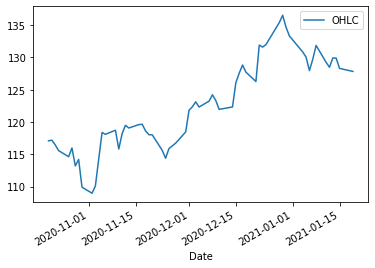

In [48]:
%matplotlib inline

graph = stock_data.plot.line(x='Date', y='OHLC')

In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

x = pd.to_datetime(stock_data['Date']).values.astype(float).reshape(-1, 1)
y = stock_data[['OHLC']]

model = reg.fit(x, y)

price_prediction = model.predict(x)

print(price_prediction)

<class 'pandas.core.frame.DataFrame'>
[[112.44586513]
 [112.67477655]
 [112.90368797]
 [113.13259939]
 [113.81933364]
 [114.04824506]
 [114.27715648]
 [114.5060679 ]
 [114.73497932]
 [115.42171358]
 [115.650625  ]
 [115.87953642]
 [116.10844784]
 [116.33735926]
 [117.02409352]
 [117.25300494]
 [117.48191636]
 [117.71082778]
 [117.93973919]
 [118.62647345]
 [118.85538487]
 [119.08429629]
 [119.31320771]
 [119.54211913]
 [120.22885339]
 [120.45776481]
 [120.68667623]
 [121.14449907]
 [121.83123332]
 [122.06014474]
 [122.28905616]
 [122.51796758]
 [122.746879  ]
 [123.43361326]
 [123.66252468]
 [123.8914361 ]
 [124.12034752]
 [124.34925894]
 [125.0359932 ]
 [125.26490462]
 [125.49381604]
 [125.72272746]
 [125.95163887]
 [126.63837313]
 [126.86728455]
 [127.09619597]
 [127.32510739]
 [128.24075307]
 [128.46966449]
 [128.69857591]
 [128.92748733]
 [129.843133  ]
 [130.07204442]
 [130.30095584]
 [130.52986726]
 [130.75877868]
 [131.44551294]
 [131.67442436]
 [131.90333578]
 [132.1322472 ]
 [

Text(0.5, 1.0, 'Latest 3 Months of Apple Share Price')

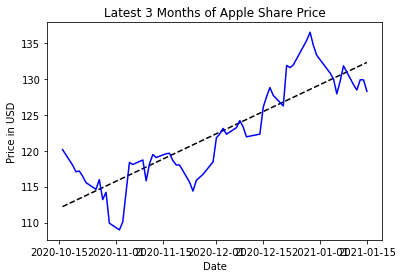

In [118]:
import matplotlib.pyplot as plt

plt.plot(stock_data['Date'], price_prediction, 'k--')
plt.plot(stock_data['Date'], stock_data['OHLC'], 'b-')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Latest 3 Months of Apple Share Price')

In [112]:
date_predict = ['2021-02-20']

x_predict = pd.to_datetime(date_predict)

y_predict = model.predict(x_predict.values.astype(float).reshape(-1, 1))

print('at {date}, the price will be around ${price}'.format(date=date_predict[0], price=round(y_predict[0][0], 2)))

at 2021-02-20, the price will be around $140.25
